In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox

In [107]:
S = pd.read_csv('synthetic_ARMA.csv')

In [108]:
S

,S1,S2
0,-0.446319,0.576042
1,-0.105804,1.046018
2,0.579134,0.630641
3,-0.149433,0.108865
4,-1.110220,0.383786
...,...,...
9995,-0.125624,1.217106
9996,-0.149925,1.104462
9997,0.395922,0.384783
9998,0.206738,-0.362712


In [78]:
import statsmodels

In [79]:
statsmodels.__version__

'0.12.2'

In [80]:
s1,s2 = S['S1'].values,S['S2'].values

# Time series S1 

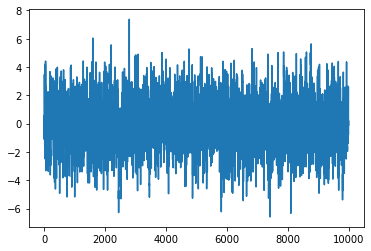

In [81]:
plt.plot(s1)

In [82]:
#it looks stationary

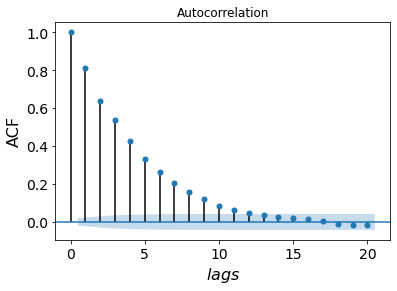

In [83]:
sm.graphics.tsa.plot_acf(s1, lags=20)
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('ACF',fontsize=16)
plt.tick_params(labelsize=14)
plt.show()

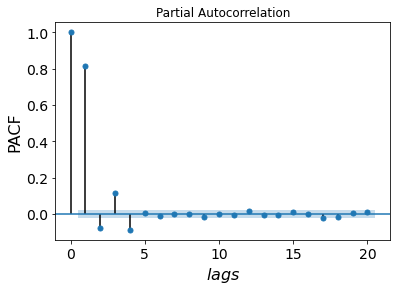

In [84]:
sm.graphics.tsa.plot_pacf(s1, lags=20)
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('PACF',fontsize=16)
plt.tick_params(labelsize=14)
plt.show()

In [85]:
# We can reject pure MA(q) model (unless we want to consider q>10, but it is too complex)
# Possible models are: AR(4),ARMA(1,1),ARMA(2,1),ARMA(1,2),ARMA(2,2)
# Maybe with trend

In [109]:
models = [(4,0,'n'),(4,0,'nc'),
          (1,1,'n'),(1,1,'nc'),
          (2,1,'n'),(2,1,'nc'),
          (1,2,'n'),(1,2,'nc'),
          (2,2,'n'),(2,2,'nc')]

In [110]:
M = {}
for p,q,trend in models:
    try:
        #fit an arma (for now without trend)
        ft = ARMA(s1,order=(p,q)).fit(method='mle',trend=trend)
        M[p,q,trend] = ft
    except ValueError:
        print(p,q,trend,'Maybe not stationary')

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


4 0 n Maybe not stationary
1 1 n Maybe not stationary


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


2 1 n Maybe not stationary


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


1 2 n Maybe not stationary


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


2 2 n Maybe not stationary


In [88]:
# trends model were rejected by the regressor.

In [119]:
AIC = pd.DataFrame( [(m,ft.aic) for m,ft in M.items()],columns=['model','AIC'] ) 

In [120]:
AIC

,model,AIC
0,"(4, 0, nc)",28388.118040
1,"(1, 1, nc)",28575.712179
2,"(2, 1, nc)",28446.828182
3,"(1, 2, nc)",28432.971367
4,"(2, 2, nc)",28409.276309


In [121]:
#AIC = AIC.assign(pvalue=np.exp((AIC.AIC.min()-AIC.AIC)/2))
AIC = AIC.assign(dAIC=(AIC.AIC-AIC.AIC.min()))

AIC

,model,AIC,dAIC
0,"(4, 0, nc)",28388.118040,0.000000
1,"(1, 1, nc)",28575.712179,187.594139
2,"(2, 1, nc)",28446.828182,58.710142
3,"(1, 2, nc)",28432.971367,44.853327
4,"(2, 2, nc)",28409.276309,21.158269


In [90]:
#Only model 0 is significant. Let inspect the parameters

In [122]:
p,q,trend = AIC.model[0]

In [123]:
M[p,q,trend].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                     ARMA(4, 0)   Log Likelihood              -14189.059
Method:                           mle   S.D. of innovations              1.000
Date:                Fri, 07 May 2021   AIC                          28388.118
Time:                        11:17:13   BIC                          28424.170
Sample:                             0   HQIC                         28400.321
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.8956      0.010     89.904      0.000       0.876       0.915
ar.L2.y       -0.1961      0.013    -14.797      0.000      -0.222      -0.170
ar.L3.y        0.1955      0.013     14.753      0.000       0.170       0.221
ar.L4.y       -0.0873      0.010     -8.761      0.000      -0.107      -0.068
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.6505           -1.8809j            1.9902           -0.3030
AR.2           -0.6505           +1.8809j            1.9902            0.3030
AR.3            1.2787           -0.0000j            1.2787           -0.0000
AR.4            2.2625           -0.0000j            2.2625           -0.0000
-----------------------------------------------------------------------------
"""

In [124]:
#All 4 AR paramters are significant. Let us check the residue

In [159]:
r = M[p,q,trend].resid

In [160]:
r

array([ 0.57604155,  0.52344828, -0.46582434, ..., -0.31998963,
       -0.45668907,  0.16621358])

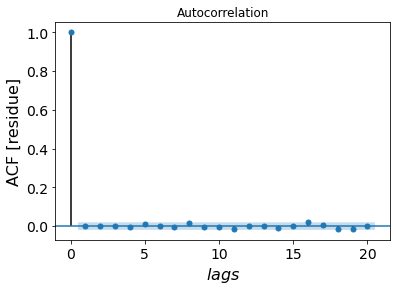

In [130]:
sm.graphics.tsa.plot_acf(r, lags=20)
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('ACF [residue]',fontsize=16)
plt.tick_params(labelsize=14)
plt.show()

In [161]:
# they seems not significant, let us check with ljungbox

acorr_ljungbox(r,lags=[p+q+1],model_df=p+q,return_df=True)

,lb_stat,lb_pvalue
5,0.257765,0.61166


In [97]:
# The pvalue is consistent with a white noise. The model 0 can be accepted

# Time series S2 

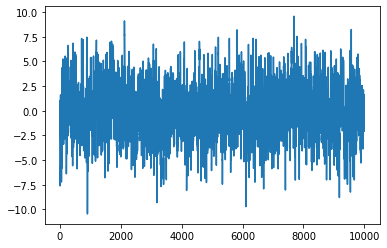

In [134]:
plt.plot(s2)

In [135]:
#it looks stationary

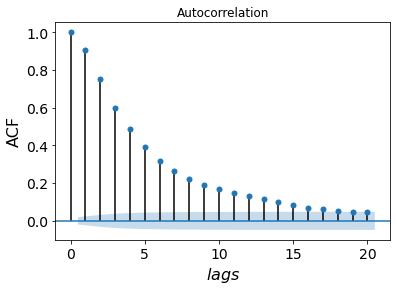

In [136]:
sm.graphics.tsa.plot_acf(s2, lags=20)
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('ACF',fontsize=16)
plt.tick_params(labelsize=14)
plt.show()

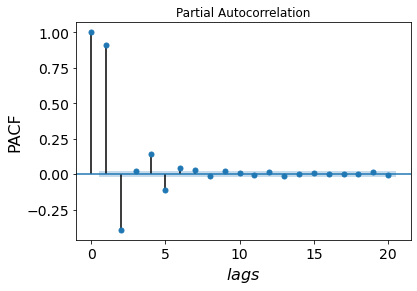

In [137]:
sm.graphics.tsa.plot_pacf(s2, lags=20)
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('PACF',fontsize=16)
plt.tick_params(labelsize=14)
plt.show()

In [138]:
# We can reject pure MA(q) model (unless we want to consider q>15, but it is too complex)
# ACF for h small seem to decrease slower then for h large. It might be an indication of an ARMA

# Possible models are: AR(4),ARMA(1,1),ARMA(2,1),ARMA(1,2),ARMA(2,2)
# Maybe with trend

In [143]:
models = [(4,0,'n'),(4,0,'nc'),
          (1,1,'n'),(1,1,'nc'),
          (2,1,'n'),(2,1,'nc'),
          (1,2,'n'),(1,2,'nc'),
          (2,2,'n'),(2,2,'nc')]

In [144]:
M = {}
for p,q,trend in models:
    try:
        #fit an arma (for now without trend)
        ft = ARMA(s2,(p,q)).fit(method='mle',trend=trend)
        M[p,q,trend] = ft
    except ValueError:
        print(p,q,trend,'Maybe not stationary')

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


4 0 n Maybe not stationary
1 1 n Maybe not stationary


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


2 1 n Maybe not stationary


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


1 2 n Maybe not stationary


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


2 2 n Maybe not stationary


In [145]:
# trends model were rejected by the regressor.

In [146]:
AIC = pd.DataFrame( [(m,ft.aic) for m,ft in M.items()],columns=['model','AIC'] ) 

#AIC = AIC.assign(pvalue=np.exp((AIC.AIC.min()-AIC.AIC)/2))
AIC = AIC.assign(dAIC=(AIC.AIC-AIC.AIC.min()))


AIC

,model,AIC,dAIC
0,"(4, 0, nc)",28413.540184,160.623292
1,"(1, 1, nc)",28941.680014,688.763123
2,"(2, 1, nc)",28610.072002,357.155110
3,"(1, 2, nc)",28316.020740,63.103849
4,"(2, 2, nc)",28252.916891,0.000000


In [147]:
#Only model 4 is significant. Let inspect the parameters

In [148]:
p,q,trend = AIC.model[4]
M[p,q,trend].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                     ARMA(2, 2)   Log Likelihood              -14121.458
Method:                           mle   S.D. of innovations              0.993
Date:                Fri, 07 May 2021   AIC                          28252.917
Time:                        11:29:31   BIC                          28288.969
Sample:                             0   HQIC                         28265.120
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.4972      0.031     16.039      0.000       0.436       0.558
ar.L2.y        0.2450      0.028      8.712      0.000       0.190       0.300
ma.L1.y        0.7935      0.029     27.331      0.000       0.737       0.850
ma.L2.y        0.3940      0.013     31.457      0.000       0.369       0.419
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2460           +0.0000j            1.2460            0.0000
AR.2           -3.2752           +0.0000j            3.2752            0.5000
MA.1           -1.0070           -1.2345j            1.5932           -0.3589
MA.2           -1.0070           +1.2345j            1.5932            0.3589
-----------------------------------------------------------------------------
"""

In [149]:
#All 2 AR and 2 MA paramters are significant. Let us check the residue

In [150]:
r = M[p,q,trend].resid

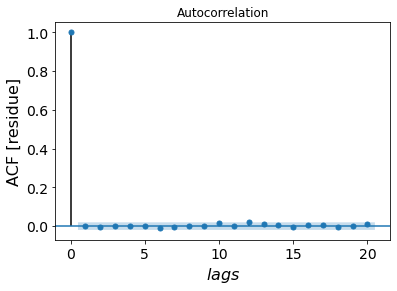

In [151]:
sm.graphics.tsa.plot_acf(r, lags=20)
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('ACF [residue]',fontsize=16)
plt.tick_params(labelsize=14)
plt.show()

In [152]:
# they seems not significant, let us check with ljungbox

acorr_ljungbox(r,lags=[p+q+1],model_df=p+q,return_df=True)

,lb_stat,lb_pvalue
5,0.257765,0.61166


In [267]:
# The pvalue is consistent with a white noise. The model 4 can be accepted

# SIMULATE AN ARMA

In [74]:
import numpy as np
import statsmodels.api as sm

#Just to have the same time-series for all the class
np.random.seed(0)

arparams = np.array([0.7,-0.2,0.2])
maparams = np.array([0.4])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
arma_process = sm.tsa.ArmaProcess(ar, ma)

dump=100
T=600
s = sm.tsa.arma_generate_sample(ar, ma,T,burnin=dump )

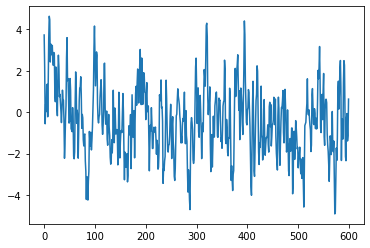

In [75]:
plt.plot(s)

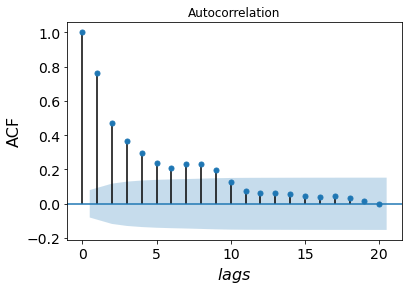

In [270]:
sm.graphics.tsa.plot_acf(s, lags=20)
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('ACF',fontsize=16)
plt.tick_params(labelsize=14)
plt.show()

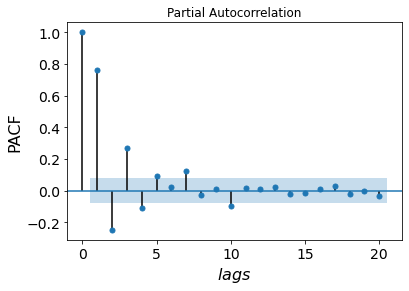

In [271]:
sm.graphics.tsa.plot_pacf(s, lags=20)
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('PACF',fontsize=16)
plt.tick_params(labelsize=14)
plt.show()

In [272]:
#Possible models AR(4), or complex ARMA. No pure MA

In [273]:
models = [(4,0,'n'),(4,0,'nc'),
          (1,1,'n'),(1,1,'nc'),
          (2,1,'n'),(2,1,'nc'),
          (1,2,'n'),(1,2,'nc'),
          (2,2,'n'),(2,2,'nc'),
          (3,1,'n'),(3,1,'nc')] #I included this one only because I know, otherwise is very unlikely from visual inspection

In [274]:
M = {}
for p,q,trend in models:
    try:
        #fit an arma (for now without trend)
        ft = ARMA(s,(p,q)).fit(method='mle',trend=trend)
        M[p,q,trend] = ft
    except ValueError:
        print(p,q,trend,'Maybe not stationary')

4 0 n Maybe not stationary
1 1 n Maybe not stationary
2 1 n Maybe not stationary
1 2 n Maybe not stationary
2 2 n Maybe not stationary
3 1 n Maybe not stationary


In [276]:
AIC = pd.DataFrame( [(m,ft.aic) for m,ft in M.items()],columns=['model','AIC'] ) 

#AIC = AIC.assign(pvalue=np.exp((AIC.AIC.min()-AIC.AIC)/2))
AIC = AIC.assign(dAIC=(AIC.AIC-AIC.AIC.min()))


AIC

,model,AIC,dAIC
0,"(4, 0, nc)",1724.743164,10.562306
1,"(1, 1, nc)",1729.008075,14.827217
2,"(2, 1, nc)",1721.106632,6.925774
3,"(1, 2, nc)",1715.879929,1.699071
4,"(2, 2, nc)",1714.180858,0.000000
5,"(3, 1, nc)",1719.856671,5.675813


In [165]:
# Possible modeles are ARMA(2,2), ARMA(1,2), ARMA(2,1),  i.e., [5,4,3,2]. Model 2 is quite unlikely

In [277]:
print(AIC.model[5])
M[AIC.model[5]].summary()

(3, 1, 'nc')


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(3, 1)   Log Likelihood                -854.928
Method:                           mle   S.D. of innovations              1.005
Date:                Sun, 02 May 2021   AIC                           1719.857
Time:                        08:40:41   BIC                           1741.841
Sample:                             0   HQIC                          1728.415
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.5192      0.148      3.518      0.000       0.230       0.808
ar.L2.y        0.0019      0.164      0.011      0.991      -0.320       0.323
ar.L3.y        0.1306      0.073      1.788      0.074      -0.013       0.274
ma.L1.y        0.5646      0.149      3.793      0.000       0.273       0.856
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3292           -0.0000j            1.3292           -0.0000
AR.2           -0.6718           -2.3044j            2.4003           -0.2951
AR.3           -0.6718           +2.3044j            2.4003            0.2951
MA.1           -1.7711           +0.0000j            1.7711            0.5000
-----------------------------------------------------------------------------
"""

In [278]:
#Both 2 and 3 lags or AR are not significant, Maybe we should prefer a simpler ARMA(1,1) instead 

In [279]:
print(AIC.model[4])
M[AIC.model[4]].summary()

(2, 2, 'nc')


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(2, 2)   Log Likelihood                -852.090
Method:                           mle   S.D. of innovations              1.000
Date:                Sun, 02 May 2021   AIC                           1714.181
Time:                        08:40:44   BIC                           1736.166
Sample:                             0   HQIC                          1722.739
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        1.1931      0.139      8.613      0.000       0.922       1.465
ar.L2.y       -0.2579      0.104     -2.470      0.014      -0.462      -0.053
ma.L1.y       -0.1167      0.131     -0.889      0.374      -0.374       0.141
ma.L2.y       -0.4979      0.064     -7.817      0.000      -0.623      -0.373
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0994           +0.0000j            1.0994            0.0000
AR.2            3.5275           +0.0000j            3.5275            0.0000
MA.1            1.3049           +0.0000j            1.3049            0.0000
MA.2           -1.5393           +0.0000j            1.5393            0.5000
-----------------------------------------------------------------------------
"""

In [280]:
# The first lag of MA is not significant, but it's not enoght to reject the model

In [281]:
print( AIC.model[3] )
M[AIC.model[3]].summary()

(1, 2, 'nc')


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(1, 2)   Log Likelihood                -853.940
Method:                           mle   S.D. of innovations              1.003
Date:                Sun, 02 May 2021   AIC                           1715.880
Time:                        08:40:45   BIC                           1733.468
Sample:                             0   HQIC                          1722.726
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.8071      0.053     15.348      0.000       0.704       0.910
ma.L1.y        0.2574      0.078      3.298      0.001       0.104       0.410
ma.L2.y       -0.3215      0.076     -4.207      0.000      -0.471      -0.172
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2390           +0.0000j            1.2390            0.0000
MA.1           -1.4081           +0.0000j            1.4081            0.5000
MA.2            2.2088           +0.0000j            2.2088            0.0000
-----------------------------------------------------------------------------
"""

In [282]:
print( AIC.model[2] )
M[AIC.model[2]].summary()

(2, 1, 'nc')


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(2, 1)   Log Likelihood                -856.553
Method:                           mle   S.D. of innovations              1.008
Date:                Sun, 02 May 2021   AIC                           1721.107
Time:                        08:40:45   BIC                           1738.694
Sample:                             0   HQIC                          1727.953
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.3524      0.073      4.800      0.000       0.209       0.496
ar.L2.y        0.2222      0.068      3.263      0.001       0.089       0.356
ma.L1.y        0.7442      0.055     13.441      0.000       0.636       0.853
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4718           +0.0000j            1.4718            0.0000
AR.2           -3.0576           +0.0000j            3.0576            0.5000
MA.1           -1.3437           +0.0000j            1.3437            0.5000
-----------------------------------------------------------------------------
"""

In [283]:
# Let us inspect for all of them the residue

In [284]:
rs = {params: M[params].resid for params in AIC.model[[2,3,4,5]]}

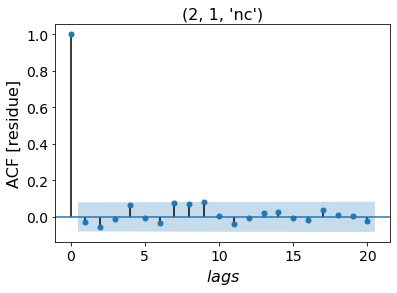

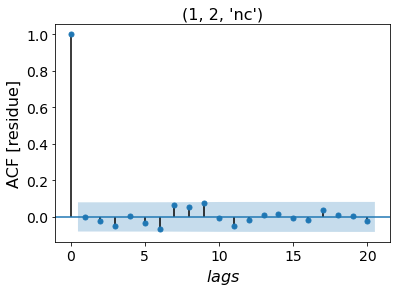

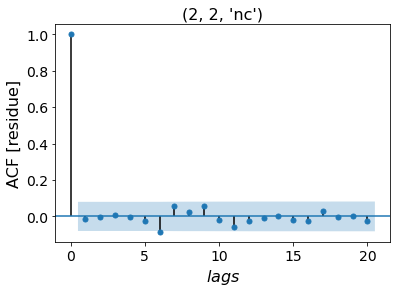

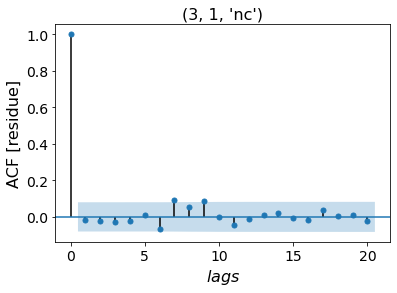

In [285]:
for params,r in rs.items():
    sm.graphics.tsa.plot_acf(r, lags=20)
    plt.xlabel(r'$lags$',fontsize=16)
    plt.ylabel('ACF [residue]',fontsize=16)
    plt.tick_params(labelsize=14)
    plt.title(params,fontsize=16)
    plt.show()

In [286]:
# They seems all good. Except for ARMA(3,1). Let us try with ljungbox test

In [287]:
Qtest = []  
for (p,q,trend),r in rs.items():
    pvalue = acorr_ljungbox(r,lags=[p+q+1],model_df=p+q,return_df=True)['lb_pvalue'][p+q+1]
    Qtest.append(( (p,q,trend), pvalue))
Qtest = pd.DataFrame( Qtest, columns=['model','residue pvalues'] )

In [288]:
Qtest

,model,residue pvalues
0,"(2, 1, nc)",0.027232
1,"(1, 2, nc)",0.176102
2,"(2, 2, nc)",0.487658
3,"(3, 1, nc)",0.255754


In [289]:
#Also for the residue ARMA(2,1) seems not very likely

#ARMA(2,2), ARMA(1,2) and ARMA(3,1) are both likely.
#  ljungbox test is better then visual inspection.

#ARMA(1,2) is simpler and must be preferred

In [290]:
#Real Model was ARMA(3,1) but it was rejected. Why?

#Answer: Small sample size, and higher order parameter too close to zero. 

# Increase higher lag strength

In [291]:
import numpy as np
import statsmodels.api as sm

#Just to have the same time-series for all the class
np.random.seed(0)

arparams = np.array([0.7,-0.4,0.4]) #this time 0.2 -> 0.4
maparams = np.array([0.4])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
arma_process = sm.tsa.ArmaProcess(ar, ma)

dump=100
T=600  # Same legnth
s = sm.tsa.arma_generate_sample(ar, ma,T,burnin=dump )

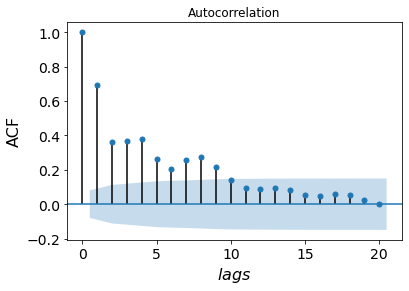

In [292]:
sm.graphics.tsa.plot_acf(s, lags=20)
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('ACF',fontsize=16)
plt.tick_params(labelsize=14)
plt.show()

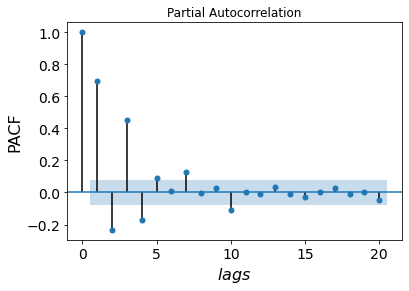

In [293]:
sm.graphics.tsa.plot_pacf(s, lags=20)
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('PACF',fontsize=16)
plt.tick_params(labelsize=14)
plt.show()

In [294]:
models = [(4,0,'n'),(4,0,'nc'),
          (1,1,'n'),(1,1,'nc'),
          (2,1,'n'),(2,1,'nc'),
          (1,2,'n'),(1,2,'nc'),
          (2,2,'n'),(2,2,'nc'),
          (3,1,'n'),(3,1,'nc')] #We can include more ARMA indeed

In [295]:
M = {}
for p,q,trend in models:
    try:
        #fit an arma (for now without trend)
        ft = ARMA(s,(p,q)).fit(method='mle',trend=trend)
        M[p,q,trend] = ft
    except ValueError:
        print(p,q,trend,'Maybe not stationary')

4 0 n Maybe not stationary
1 1 n Maybe not stationary
2 1 n Maybe not stationary
1 2 n Maybe not stationary
2 2 n Maybe not stationary
3 1 n Maybe not stationary


In [296]:
AIC = pd.DataFrame( [(m,ft.aic) for m,ft in M.items()],columns=['model','AIC'] ) 

#AIC = AIC.assign(pvalue=np.exp((AIC.AIC.min()-AIC.AIC)/2))
AIC = AIC.assign(dAIC=(AIC.AIC-AIC.AIC.min()))

AIC

,model,AIC,dAIC
0,"(4, 0, nc)",1725.626810,5.250470
1,"(1, 1, nc)",1768.252406,47.876066
2,"(2, 1, nc)",1766.621004,46.244664
3,"(1, 2, nc)",1736.664722,16.288382
4,"(2, 2, nc)",1735.191376,14.815036
5,"(3, 1, nc)",1720.376340,0.000000


In [298]:
# This time (3,1) and (4,0,) is significantly better then the others

In [299]:
params =  AIC.model[5] 
print(params)
M[params].summary()

(3, 1, 'nc')


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(3, 1)   Log Likelihood                -855.188
Method:                           mle   S.D. of innovations              1.005
Date:                Sun, 02 May 2021   AIC                           1720.376
Time:                        08:41:51   BIC                           1742.361
Sample:                             0   HQIC                          1728.935
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.6601      0.075      8.755      0.000       0.512       0.808
ar.L2.y       -0.3517      0.080     -4.407      0.000      -0.508      -0.195
ar.L3.y        0.3897      0.047      8.298      0.000       0.298       0.482
ma.L1.y        0.4206      0.082      5.120      0.000       0.260       0.582
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2268           -0.0000j            1.2268           -0.0000
AR.2           -0.1622           -1.4371j            1.4463           -0.2679
AR.3           -0.1622           +1.4371j            1.4463            0.2679
MA.1           -2.3777           +0.0000j            2.3777            0.5000
-----------------------------------------------------------------------------
"""

In [300]:
params =  AIC.model[0] 
print(params)
M[params].summary()

(4, 0, 'nc')


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(4, 0)   Log Likelihood                -857.813
Method:                           mle   S.D. of innovations              1.009
Date:                Sun, 02 May 2021   AIC                           1725.627
Time:                        08:42:00   BIC                           1747.611
Sample:                             0   HQIC                          1734.185
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        1.0557      0.040     26.196      0.000       0.977       1.135
ar.L2.y       -0.7379      0.053    -13.834      0.000      -0.842      -0.633
ar.L3.y        0.6278      0.054     11.729      0.000       0.523       0.733
ar.L4.y       -0.1644      0.041     -4.057      0.000      -0.244      -0.085
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.0907           -1.3243j            1.3274           -0.2609
AR.2           -0.0907           +1.3243j            1.3274            0.2609
AR.3            1.2601           -0.0000j            1.2601           -0.0000
AR.4            2.7392           -0.0000j            2.7392           -0.0000
-----------------------------------------------------------------------------
"""

In [302]:
params =  AIC.model[5] 

In [303]:
#All significant, and quite close to real parameters

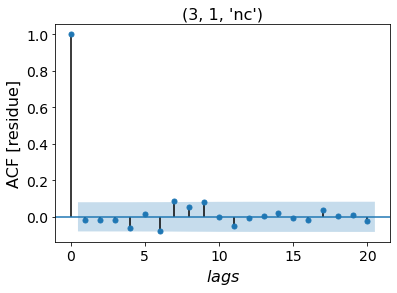

In [304]:
r = M[params].resid
sm.graphics.tsa.plot_acf(r, lags=20)
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('ACF [residue]',fontsize=16)
plt.tick_params(labelsize=14)
plt.title(params,fontsize=16)
plt.show()

In [305]:
p,q,trend = params
acorr_ljungbox(r,lags=[p+q+1],model_df=p+q,return_df=True)

,lb_stat,lb_pvalue
5,2.866409,0.090446


In [306]:
params =  AIC.model[0] 

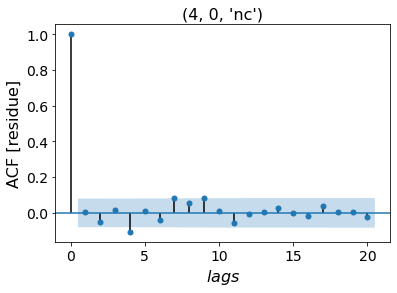

In [307]:
r = M[params].resid
sm.graphics.tsa.plot_acf(r, lags=20)
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('ACF [residue]',fontsize=16)
plt.tick_params(labelsize=14)
plt.title(params,fontsize=16)
plt.show()

In [308]:
p,q,trend = params
acorr_ljungbox(r,lags=[p+q+1],model_df=p+q,return_df=True)

,lb_stat,lb_pvalue
5,8.680686,0.003216


In [231]:
# It's ok. We can accept ARMA(3,1)

# Increase time-series length [low higher lag strenth]

In [183]:
import numpy as np
import statsmodels.api as sm

#Just to have the same time-series for all the class
np.random.seed(0)

arparams = np.array([0.7,-0.2,0.2])  # low strength for 2,3 lags
maparams = np.array([0.4])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
arma_process = sm.tsa.ArmaProcess(ar, ma)

dump=100
T=1500  # longer time-series 600 -> 1500
s = sm.tsa.arma_generate_sample(ar, ma,T,burnin=dump )

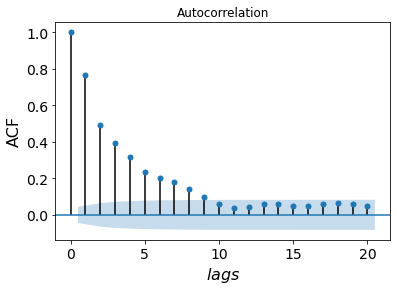

In [179]:
sm.graphics.tsa.plot_acf(s, lags=20)
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('ACF',fontsize=16)
plt.tick_params(labelsize=14)
plt.show()

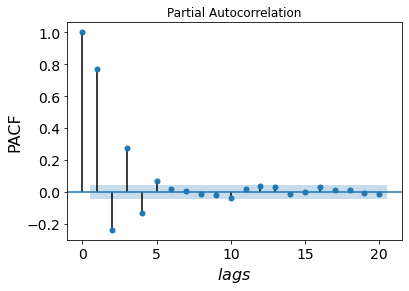

In [180]:
sm.graphics.tsa.plot_pacf(s, lags=20)
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('PACF',fontsize=16)
plt.tick_params(labelsize=14)
plt.show()

In [184]:
models = [(4,0,'n'),(4,0,'nc'),
          (1,1,'n'),(1,1,'nc'),
          (2,1,'n'),(2,1,'nc'),
          (1,2,'n'),(1,2,'nc'),
          (2,2,'n'),(2,2,'nc'),
          (3,1,'n'),(3,1,'nc')] #We can include more ARMA indeed

In [185]:
M = {}
for p,q,trend in models:
    try:
        #fit an arma (for now without trend)
        ft = ARMA(s,(p,q)).fit(method='mle',trend=trend)
        M[p,q,trend] = ft
    except ValueError:
        print(p,q,trend,'Maybe not stationary')

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


4 0 n Maybe not stationary
1 1 n Maybe not stationary


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


2 1 n Maybe not stationary


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


1 2 n Maybe not stationary


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


2 2 n Maybe not stationary


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


3 1 n Maybe not stationary


In [186]:
AIC = pd.DataFrame( [(m,ft.aic) for m,ft in M.items()],columns=['model','AIC'] ) 

AIC = AIC.assign(dAIC=(AIC.AIC-AIC.AIC.min()))

AIC

,model,AIC,dAIC
0,"(4, 0, nc)",4207.388942,9.787907
1,"(1, 1, nc)",4231.662324,34.061288
2,"(2, 1, nc)",4214.196267,16.595231
3,"(1, 2, nc)",4200.746752,3.145717
4,"(2, 2, nc)",4199.216616,1.615580
5,"(3, 1, nc)",4197.601035,0.000000


In [224]:
#Model ARMA(3,1) is the better, ARMA(4,0) cannot be rejected

In [225]:
params =  AIC.model[5] 
print(params)
M[params].summary()

(3, 1, 'nc')


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(3, 1)   Log Likelihood                -855.188
Method:                           mle   S.D. of innovations              1.005
Date:                Sat, 01 May 2021   AIC                           1720.376
Time:                        12:14:32   BIC                           1742.361
Sample:                             0   HQIC                          1728.935
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.6601      0.075      8.755      0.000       0.512       0.808
ar.L2.y       -0.3517      0.080     -4.407      0.000      -0.508      -0.195
ar.L3.y        0.3897      0.047      8.298      0.000       0.298       0.482
ma.L1.y        0.4206      0.082      5.120      0.000       0.260       0.582
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2268           -0.0000j            1.2268           -0.0000
AR.2           -0.1622           -1.4371j            1.4463           -0.2679
AR.3           -0.1622           +1.4371j            1.4463            0.2679
MA.1           -2.3777           +0.0000j            2.3777            0.5000
-----------------------------------------------------------------------------
"""

In [226]:
params =  AIC.model[0] 
print(params)
M[params].summary()

(4, 0, 'nc')


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(4, 0)   Log Likelihood                -857.813
Method:                           mle   S.D. of innovations              1.009
Date:                Sat, 01 May 2021   AIC                           1725.627
Time:                        12:14:43   BIC                           1747.611
Sample:                             0   HQIC                          1734.185
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        1.0557      0.040     26.196      0.000       0.977       1.135
ar.L2.y       -0.7379      0.053    -13.834      0.000      -0.842      -0.633
ar.L3.y        0.6278      0.054     11.729      0.000       0.523       0.733
ar.L4.y       -0.1644      0.041     -4.057      0.000      -0.244      -0.085
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.0907           -1.3243j            1.3274           -0.2609
AR.2           -0.0907           +1.3243j            1.3274            0.2609
AR.3            1.2601           -0.0000j            1.2601           -0.0000
AR.4            2.7392           -0.0000j            2.7392           -0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
#All significant. Let us look at the residue

In [227]:
rs = {params: M[params].resid for params in AIC.model[[5,0]]}

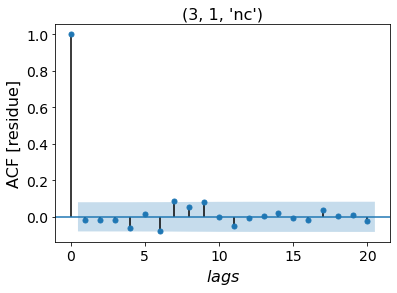

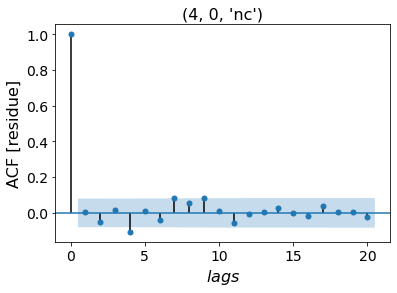

In [228]:
for params,r in rs.items():
    sm.graphics.tsa.plot_acf(r, lags=20)
    plt.xlabel(r'$lags$',fontsize=16)
    plt.ylabel('ACF [residue]',fontsize=16)
    plt.tick_params(labelsize=14)
    plt.title(params,fontsize=16)
    plt.show()

In [ ]:
#It seems that ARMA(4,0) has a lag significant

In [229]:
Qtest = []  
for (p,q,trend),r in rs.items():
    pvalue = acorr_ljungbox(r,lags=[p+q+1],model_df=p+q,return_df=True)['lb_pvalue'][p+q+1]
    Qtest.append(( (p,q,trend), pvalue))
Qtest = pd.DataFrame( Qtest, columns=['model','residue pvalues'] )

In [230]:
Qtest

,model,residue pvalues
0,"(3, 1, nc)",0.090446
1,"(4, 0, nc)",0.003216


In [ ]:
#Yes, we can reject ARMA(4,0). Best model is ARMA(3,1)
#Indeed if they were both ok, I would prefer ARMA(3,1) both for the AIC and less lag